## 1. TV, halftime shows, and the Big Game
<p>Whether or not you like American football, the Super Bowl is a spectacle. There is always a little something for everyone. For the die-hard fans, there is the game itself with blowouts, comebacks, and controversy. For the not so die-hard fans, there are the ridiculously expensive ads that are hilarious, gut-wrenching, thought-provoking, and sometimes weird. And of course, there are the halftime shows with the biggest musicians in the world entertaining us by <a href="https://youtu.be/ZD1QrIe--_Y?t=14">riding a giant mechanical tiger</a> or <a href="https://youtu.be/mjrdywp5nyE?t=62">leaping from the roof of the stadium</a>. It is a grand show! In this notebook, we're going to explore how some of these elements interact with each other. After exploring and cleaning the data, we're going to answer questions like:</p>
<ul>
<li>What are the most extreme game outcomes?</li>
<li>How does the score difference affect television viewership?</li>
<li>How have viewership, TV ratings, and advertisement costs evolved?</li>
<li>Who are the most prolific musicians in terms of halftime show performances?</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_691/img/left_shark.jpg" alt="Left Shark Steals The Show">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">Left Shark Steals The Show</a>. Katy Perry performing at halftime of Super Bowl XLIX. Photo by Huntley Paton. Attribution-ShareAlike 2.0 Generic (CC BY-SA 2.0).</em></p>
<p>The dataset we'll use was <a href="https://en.wikipedia.org/wiki/Web_scraping">scraped</a> and polished from Wikipedia. It is made up of three CSV files, one with <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">game data</a>, one with <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">TV data</a>, and one with <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">halftime musician data</a> for all 52 Super Bowls through 2018.</p>

    Whether you're a sports enthusiast or just in it for the entertainment, the Super Bowl is a cultural phenomenon. From nail-biting games to unforgettable halftime shows and iconic commercials, there's something for everyone. In this project, we delve into the data behind the Super Bowl events to uncover intriguing insights.

In [108]:
# Load packages
library(tidyverse)

# Load the CSV data
super_bowls  <-  suppressMessages(read_csv("datasets/super_bowls.csv"))
tv  <-  suppressMessages(read_csv("datasets/tv.csv"))
halftime_musicians  <-  suppressMessages(read_csv("datasets/halftime_musicians.csv"))

# Display the first six rows of each tibble
head(super_bowls)
head(tv)
head(halftime_musicians)

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NA,Doug Pederson,New England Patriots,33,Tom Brady,NA,Bill Belichick,74,8
2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NA,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NA,Dan Quinn,62,6
2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NA,Gary Kubiak,Carolina Panthers,10,Cam Newton,NA,Ron Rivera,34,14
2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NA,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NA,Pete Carroll,52,4
2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NA,Pete Carroll,Denver Broncos,8,Peyton Manning,NA,John Fox,51,35
2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NA,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NA,Jim Harbaugh,65,3


super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,NBC,103390000,NA,43.1,68,33.4,78,5000000
51,Fox,111319000,172000000,45.3,73,37.1,79,5000000
50,CBS,111864000,167000000,46.6,72,37.7,79,5000000
49,NBC,114442000,168000000,47.5,71,39.1,79,4500000
48,Fox,112191000,167000000,46.7,69,39.3,77,4000000
47,CBS,108693000,164100000,46.3,69,39.7,77,4000000


super_bowl,musician,num_songs
<dbl>,<chr>,<dbl>
52,Justin Timberlake,11
52,University of Minnesota Marching Band,1
51,Lady Gaga,7
50,Coldplay,6
50,Beyonc<U+00E9>,3
50,Bruno Mars,3


## 2. Taking note of dataset issues
    A quick glance at the Super Bowl game data reveals a seemingly complete dataset, with the exception of missing values in backup quarterback columns, which aligns with the typical playtime of starting quarterbacks. However, a closer look at TV and halftime musician data hints at potential missing values, especially in the early years. Let's explore these datasets further.

In [109]:
# Summary of the TV data
summary(tv)

# Summary of the halftime musician data 
summary(halftime_musicians)

   super_bowl      network          avg_us_viewers      total_us_viewers   
 Min.   : 1.00   Length:53          Min.   : 24430000   Min.   : 51180000  
 1st Qu.:13.00   Class :character   1st Qu.: 73852000   1st Qu.:142900000  
 Median :26.00   Mode  :character   Median : 85240000   Median :153400000  
 Mean   :26.02                      Mean   : 80709585   Mean   :148872000  
 3rd Qu.:39.00                      3rd Qu.: 92570000   3rd Qu.:165550000  
 Max.   :52.00                      Max.   :114442000   Max.   :172000000  
                                                        NA's   :38         
 rating_household share_household  rating_18_49    share_18_49   
 Min.   :18.5     Min.   :36.00   Min.   :33.40   Min.   :77.00  
 1st Qu.:41.3     1st Qu.:63.00   1st Qu.:36.90   1st Qu.:77.25  
 Median :43.3     Median :67.00   Median :37.90   Median :78.50  
 Mean   :42.7     Mean   :66.38   Mean   :38.01   Mean   :78.17  
 3rd Qu.:46.0     3rd Qu.:71.00   3rd Qu.:39.50   3rd Qu.:79.0

   super_bowl      musician           num_songs     
 Min.   : 1.00   Length:134         Min.   : 1.000  
 1st Qu.:17.25   Class :character   1st Qu.: 1.000  
 Median :31.50   Mode  :character   Median : 2.000  
 Mean   :29.09                      Mean   : 2.955  
 3rd Qu.:41.00                      3rd Qu.: 3.250  
 Max.   :52.00                      Max.   :11.000  
                                    NA's   :46      

## 3. Combined points distribution
    Examining the TV data highlights notable missing values in columns such as total U.S. viewers and ratings. Similarly, halftime musician data shows a significant number of missing entries for the number of songs performed. Despite these gaps, we move on to visualize the distribution of combined points in Super Bowls, pinpointing games with the highest and lowest scores.

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NA,Doug Pederson,New England Patriots,33,Tom Brady,NA,Bill Belichick,74,8
1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NA,George Seifert,San Diego Chargers,26,Stan Humphreys,NA,Bobby Ross,75,23
1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NA,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NA,Bud Grant,22,10
1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NA,Don Shula,Washington Redskins,7,Bill Kilmer,NA,George Allen,21,7
1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NA,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


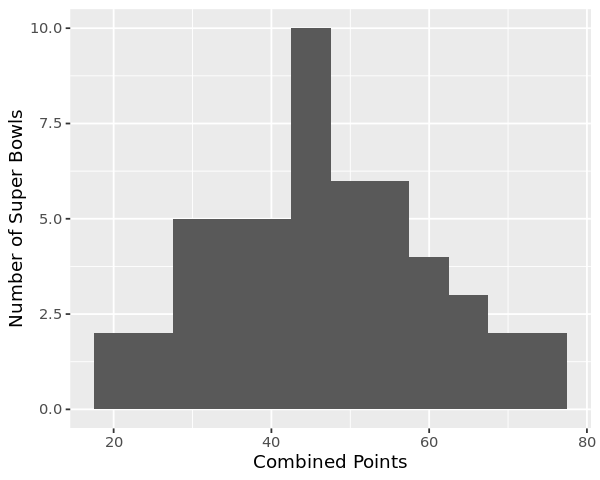

In [110]:
# Reduce the size of the plots
options(repr.plot.width = 5, repr.plot.height = 4)

# Plot a histogram of combined points
ggplot(super_bowls, aes(x = combined_pts)) +
 geom_histogram(binwidth = 5) +
 labs(x = "Combined Points", y = "Number of Super Bowls")

# Display the highest- and lowest-scoring Super Bowls
super_bowls  %>% 
 filter(combined_pts > 70 | combined_pts < 25)

## 4. Point difference distribution
    Super Bowls typically see combined scores between 40 and 50 points, with extreme scores at both ends. Games with the highest scores often feature dominant quarterback performances, while lower-scoring games are attributed to tough defenses or adverse weather conditions. Let's explore the point difference between teams in each Super Bowl.

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NA,Bill Parcells,Buffalo Bills,19,Jim Kelly,NA,Marv Levy,39,1
1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NA,George Seifert,Denver Broncos,10,John Elway,NA,Dan Reeves,65,45


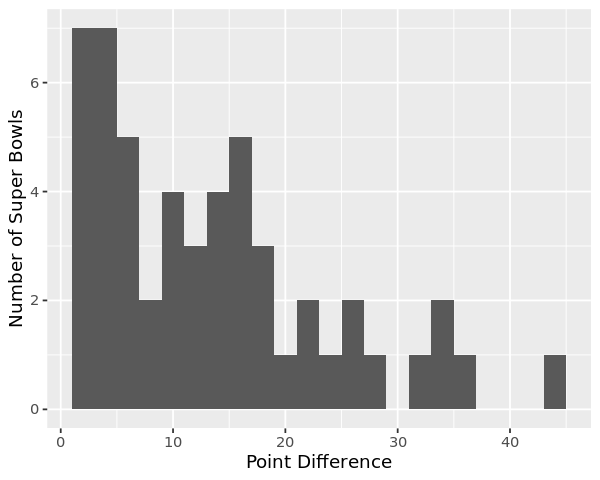

In [111]:
# Reduce the size of the plots
options(repr.plot.width = 5, repr.plot.height = 4)

# Plot a histogram of point differences
ggplot(super_bowls, aes(difference_pts)) +
 geom_histogram(binwidth = 2) +
 labs(x = "Point Difference", y = "Number of Super Bowls")

# Display the closest game and largest blow out
super_bowls  %>% 
 filter(difference_pts == min(difference_pts) | difference_pts == max(difference_pts))

## 5. Do blowouts translate to lost viewers?
    Most Super Bowls are closely contested, but blowouts are not uncommon. We explore whether large point differences between teams correlate with a decline in viewership, analyzing the household share (percentage of U.S. households with a TV in use watching the entire broadcast) against point differences.
    


 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 

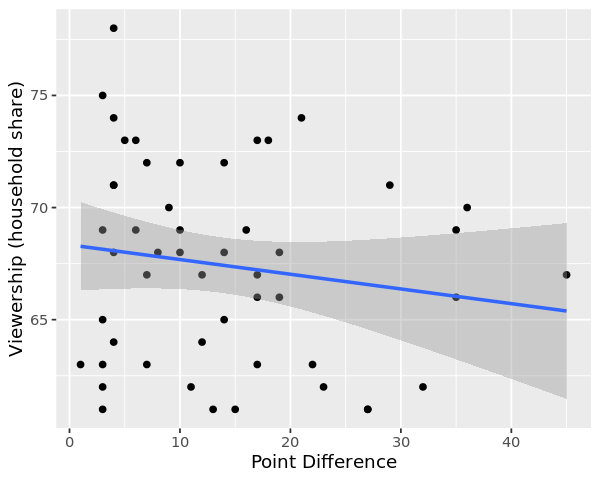

In [112]:
# Filter out Super Bowl I and join the game data and TV data
games_tv <- tv  %>% 
 filter(super_bowl != 1)  %>% 
 inner_join(super_bowls, by = "super_bowl")


table(games_tv$super_bowl)

# Create a scatter plot with a linear regression model
ggplot(games_tv, aes(difference_pts, share_household)) +
     geom_point() +
     geom_smooth(method = "lm") +
     labs(x = "Point Difference", y = "Viewership (household share)")

## 6. Viewership and the ad industry over time
<    A regression analysis suggests a potential trend: viewership tends to decrease in blowout games. However, we acknowledge the weak linear relationship due to the limited sample size. Shifting our focus to halftime shows, we explore how advertisement costs evolved alongside viewership and household ratings over time. A 30-second spot costs a pretty <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1">\$5 million</a> now, but has it always been that much? And how has the number of viewers and household ratings trended alongside advertisement cost? We can find out using line plots that share a "Super Bowl" x-axis.</p>

In [113]:
head(games_tv)

super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,...,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
52,NBC,103390000,NA,43.1,68,33.4,78,5000000,2018-02-04,...,Nick Foles,NA,Doug Pederson,New England Patriots,33,Tom Brady,NA,Bill Belichick,74,8
51,Fox,111319000,172000000,45.3,73,37.1,79,5000000,2017-02-05,...,Tom Brady,NA,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NA,Dan Quinn,62,6
50,CBS,111864000,167000000,46.6,72,37.7,79,5000000,2016-02-07,...,Peyton Manning,NA,Gary Kubiak,Carolina Panthers,10,Cam Newton,NA,Ron Rivera,34,14
49,NBC,114442000,168000000,47.5,71,39.1,79,4500000,2015-02-01,...,Tom Brady,NA,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NA,Pete Carroll,52,4
48,Fox,112191000,167000000,46.7,69,39.3,77,4000000,2014-02-02,...,Russell Wilson,NA,Pete Carroll,Denver Broncos,8,Peyton Manning,NA,John Fox,51,35
47,CBS,108693000,164100000,46.3,69,39.7,77,4000000,2013-02-03,...,Joe Flacco,NA,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NA,Jim Harbaugh,65,3


In [114]:
# Convert the data format for plotting
# Assuming games_tv is the original data frame

# Convert the data format for plotting
games_tv_plot <- games_tv %>% 
  gather(key = "category", value = "value", avg_us_viewers, rating_household, ad_cost) %>%
  mutate(
    cat_name = case_when(
      category == "avg_us_viewers" ~ "Average number of US viewers",
      category == "rating_household" ~ "Household rating",
      category == "ad_cost" ~ "Advertisement cost (USD)",
      TRUE ~ as.character(category)
    )
  )

In [1]:
games_tv_plot <- games_tv %>% 
  gather(key = "category", value = "value", avg_us_viewers, rating_household, ad_cost) %>%
  mutate(
    cat_name = case_when(
      category == "avg_us_viewers" ~ "Average number of US viewers",
      category == "rating_household" ~ "Household rating",
      category == "ad_cost" ~ "Advertisement cost (USD)",
      TRUE ~ as.character(category)
    )
  )



ERROR: Error in games_tv %>% gather(key = "category", value = "value", avg_us_viewers, : could not find function "%>%"


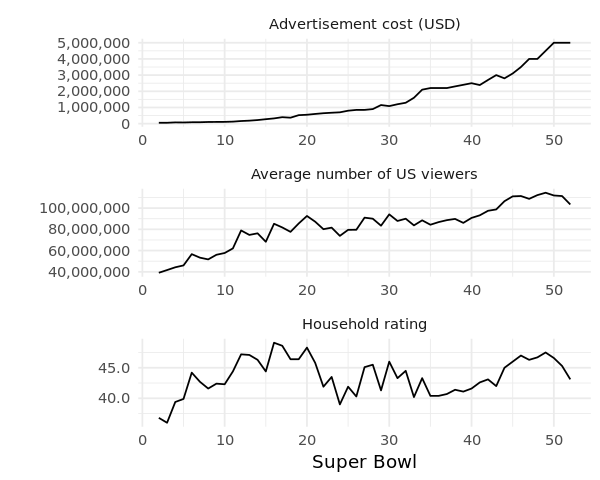

In [116]:
# Plot the data
# Plot the data
ggplot(games_tv_plot, aes(x = super_bowl, y = value)) +
  geom_line() +
  facet_wrap(~ cat_name, scales = "free", nrow = 3) +
  labs(x = "Super Bowl", y = "") +
  theme_minimal() +
  scale_y_continuous(labels = scales::label_comma())  # This line formats the y-axis labels with commas


## 7. Halftime shows weren't always this great
    Before the era of star-studded halftime acts, performances featured diverse acts, including marching bands, children's choirs, and impersonators. Examples include a Frosty The Snowman rap, an Elvis impersonator doing magic tricks, and tap-dancing ponies. The NFL's realization of the viewership boost brought by major acts reshaped halftime shows.

In [117]:
head(halftime_musicians)

super_bowl,musician,num_songs
<dbl>,<chr>,<dbl>
52,Justin Timberlake,11
52,University of Minnesota Marching Band,1
51,Lady Gaga,7
50,Coldplay,6
50,Beyonc<U+00E9>,3
50,Bruno Mars,3


In [118]:
# Filter and diplay halftime musicians before and including Super Bowl XXVII
pre_MJ  <- halftime_musicians  %>% 
 filter( super_bowl <= 27)  %>% 
 print(sort = TRUE)

# A tibble: 54 x 3
   super_bowl musician                              num_songs
        <dbl> <chr>                                     <dbl>
 1         27 Michael Jackson                               5
 2         26 Gloria Estefan                                2
 3         26 University of Minnesota Marching Band        NA
 4         25 New Kids on the Block                         2
 5         24 Pete Fountain                                 1
 6         24 Doug Kershaw                                  1
 7         24 Irma Thomas                                   1
 8         24 Pride of Nicholls Marching Band              NA
 9         24 The Human Jukebox                            NA
10         24 Pride of Acadiana                            NA
# ... with 44 more rows


In [119]:
print(halftime_musicians, desc(num_songs))

# A tibble: 134 x 3
   super_bowl musician                                 num_songs
        <dbl> <chr>                                        <dbl>
 1         52 "Justin Timberlake"                             11
 2         52 "University of Minnesota Marching Band"          1
 3         51 "Lady Gaga"                                      7
 4         50 "Coldplay"                                       6
 5         50 "Beyonc\u00e9"                                   3
 6         50 "Bruno Mars"                                     3
 7         50 "Mark Ronson"                                    1
 8         50 "University of California Marching Band"         3
 9         50 "Youth Orchestra Los Angeles"                    3
10         50 "Gustavo Dudamel"                                3
# ... with 124 more rows


## 8. Who has the most halftime show appearances?
<p>Now that's a lot of marching bands! There was also the American jazz clarinetist, Pete Fountain, and Miss Texas 1973 played the violin. Nothing against those performers - they are just simply not <a href="https://www.youtube.com/watch?v=suIg9kTGBVI">Beyoncé</a>. To be fair, no one is.</p>
<p>Let's find all the musicians who performed at the Super Bowl more than once and count their performances.</p>

In [120]:
# Display the musicians who performed more than once
halftime_musicians  %>% 
    count(musician, sort = TRUE)  %>% 
    filter(n > 1) 
    


musician,n
<chr>,<int>
Grambling State University Tiger Marching Band,6
Al Hirt,4
Up with People,4
The Human Jukebox,3
Beyonc<U+00E9>,2
Bruno Mars,2
Florida A&M University Marching 100 Band,2
Gloria Estefan,2
Justin Timberlake,2


## 9. Who performed the most songs in a halftime show?
Identifying musicians who performed at the Super Bowl more than once, we discover a mix of popular artists and marching bands. The Grambling State University Tiger Marching Band stands out with six appearances, while post-2000 musicians like Beyoncé and Justin Timberlake make multiple showings.

super_bowl,musician,num_songs
<dbl>,<chr>,<dbl>
52,Justin Timberlake,11
51,Lady Gaga,7
50,Coldplay,6
50,Beyonc<U+00E9>,3
50,Bruno Mars,3
50,Mark Ronson,1
50,Youth Orchestra Los Angeles,3
50,Gustavo Dudamel,3
49,Katy Perry,8


Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

super_bowl,musician,num_songs
<dbl>,<chr>,<dbl>
52,Justin Timberlake,11
30,Diana Ross,10
49,Katy Perry,8
51,Lady Gaga,7
47,Beyonc<U+00E9>,7
41,Prince,7
23,Elvis Presto,7
50,Coldplay,6
48,Bruno Mars,6


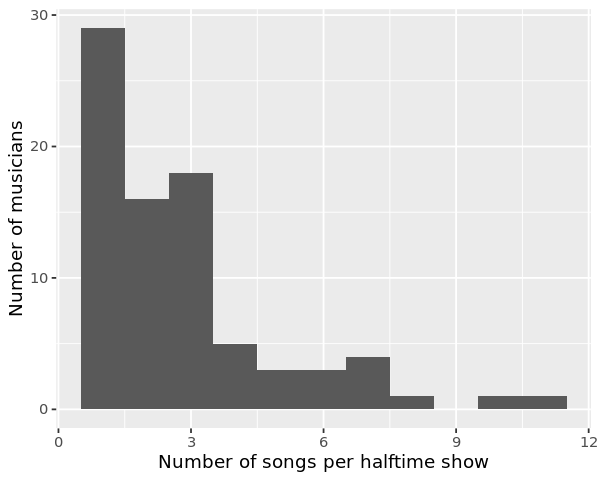

In [126]:
# Remove marching bands and data before Super Bowl XX
musicians_songs  <- halftime_musicians  %>% 
    filter(!str_detect(musician, "Marching"),
           !str_detect(musician, "Spirit"),
          super_bowl > 20)

musicians_songs

# Plot a histogram of the number of songs per performance
ggplot(musicians_songs, aes(num_songs)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Number of songs per halftime show", y = "Number of musicians")

# Display the musicians with more than four songs per show
musicians_songs  %>% 
    filter(num_songs > 4)  %>% 
    arrange(desc(num_songs))

## 10. Conclusion
    Wrapping up our analysis, we've loaded, cleaned, and explored Super Bowl game, television, and halftime show data. We visualized score distributions, point differences, and halftime show performances. Trends in advertisement costs, viewership, and the impact of blowouts on viewership were uncovered. As we gear up for the next Super Bowl, we leave you with the question: Who will win Super Bowl LIII? (Spoiler alert: Patriots or Rams?)
<p>This year's Big Game will be here before you know it. Who do you think will win Super Bowl LIII?</p>
<p><em>UPDATE: <a href="https://en.wikipedia.org/wiki/Super_Bowl_LIII">Spoiler alert</a>.</em></p>

In [ ]:
# 2018-2019 conference champions
patriots <-  "New England Patriots"
rams  <- "Los Angeles Rams"

# Who will win Super Bowl LIII?
super_bowl_LIII_winner  <-  ....
paste("The winner of Super Bowl LIII will be the", super_bowl_LIII_winner)